

## *Deep Learning*

🧑 **Daniel Bielech** (db662)

🏫 University of Kent


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---

## **Solution**

In [10]:
from keras.datasets import fashion_mnist

# Load the data from the fashion mnist dataset.
# The data is already split into training and test sets.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()



# Normalize the data by dividing by the maximum pixel value (255).
# This ensures that all values are between 0 and 1 and will make it easier for the network to learn.
x_train = x_train / 255
x_test = x_test / 255

# When loading the MNIST dataset, each image in the dataset is represented as a 2D array of shape (28 x 28) with values between 0 and 255.
# However, the CNN expects the input to be a 3D array of shape (28 x 28 x 1).
# The third dimension is the colour channel, which is 1 for grayscale images in case of MNIST. 
# For RGB images, the third dimension would be 3 - one for each colour channel (Red, Green and Blue).
# That is why we reshape the data to include the single colour channel (grayscale).
print("Training data shape before reshaping: ", x_train.shape)
training_samples = x_train.shape[0]
testing_samples = x_test.shape[0]
x_train = x_train.reshape(training_samples, 28, 28, 1)
x_test = x_test.reshape(testing_samples, 28, 28, 1)
print("Training data shape after reshaping: ", x_train.shape)
# Reserve a portion of the training data for validation.
# The validation data will be used to evaluate the model's performance during training.
no_validation_samples = int(training_samples * 0.2)
x_validation = x_train[:no_validation_samples]
y_validation = y_train[:no_validation_samples]
print("Validation data samples: ", x_validation.shape[0])
x_train = x_train[no_validation_samples:]
y_train = y_train[no_validation_samples:]
print("Training data samples: ", x_train.shape[0])
print("Test data samples: ", x_test.shape[0])

Training data shape before reshaping:  (60000, 28, 28)
Training data shape after reshaping:  (60000, 28, 28, 1)
Validation data samples:  12000
Training data samples:  48000
Test data samples:  10000


Import the dataset and divide it into training, validation and test sets. Explain how you obtained the validation set. How did you choose the size of the validation set? **(10 marks)**

**Answer:** By using the initial 20% of the training data, I was able to create the validation set. The rest (80%) is used for training. I choose 20% because it is a good balance between the size of data used for training and  data used for validation. It guarantees that we have a sufficient amount of data to train the model (48000 samples) as well as a sufficient amount to evaluate its performance (12000 samples).

---

Training data shape:  (48000, 28, 28, 1) (48000,)
Validation data shape:  (12000, 28, 28, 1) (12000,)
Test data shape:  (10000, 28, 28, 1) (10000,)
10 Training labels:  [6 4 1 0 0 5 7 5 4 0]


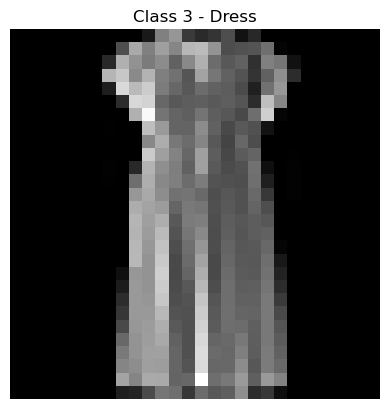

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Print the shape of the training, validation and test sets.
print('Training data shape: ', x_train.shape, y_train.shape)
print('Validation data shape: ', x_validation.shape, y_validation.shape)
print('Test data shape: ', x_test.shape, y_test.shape)

# Print first 10 training labels.
print('10 Training labels: ', y_train[:10])

# Visualise a random sample image from the training data.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
i = np.random.randint(1, x_train.shape[0]) # Pick a random index between 1 and the number of training samples.
label = class_names[y_train[i]] # Get the corresponding label.
plt.imshow(x_train[i], cmap='gray') # Plot the image in greyscale.
plt.axis("off") # Remove axes
plt.title("Class " + str(y_train[i]) + " - " + label) # Add title
plt.show()


Visualise a random sample image of the dataset. **(10 marks)**

---



In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2
import tensorflow as tf

# Make sure the model is run on the GPU.
tf.config.set_visible_devices([], 'GPU')
with tf.device('/gpu:0'):
  # Create a model object.
  # Each layer in the model is connected to the next layer sequentially in a feed-forward manner.
  model = Sequential()
  # Regularization L2.
  l2 = l2(0.001)
  # The first layer in the model must specify the input shape (in this case it is a shape of a single training sample).
  # Add a convolutional layer with 32 filters, a 3x3 kernel and a ReLU activation function.
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
  # Add a max pooling layer with a 2x2 pool size.
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Add a convolutional layer with 64 filters, a 3x3 kernel and a ReLU activation function.
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  # Add a max pooling layer with a 2x2 pool size.
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Add a flatten layer.
  # This layer converts the 2D output of the previous layer into a 1D array.
  # This is required because the next layer is a dense layer (fully connected layer), which expects a 1D input.
  model.add(Flatten())
  # Add a dense layer with 256 neurons and a ReLU activation function.
  # Apply L2 regularization to the weights of this layer.
  model.add(Dense(256, activation='relu',  kernel_regularizer=l2))
  # Add a dense layer with 128 neurons and a ReLU activation function.
  model.add(Dense(128, activation='relu'))
  # Add a dense layer with 10 neurons and a softmax activation function.
  # Produce a probability distribution over the 10 classes.
  # Each neuron represents a class and the output of the neuron is the probability that the input image belongs to that class.
  model.add(Dense(10, activation='softmax'))

In [13]:
# Choose the the optimizer, the loss function, and the metrics to be used to calculate the performance of the model during training.
# 'Accuracy' measures the percentage of correctly classified images.
# For optimizer I chose 'adam' because it is a popular optimizer that is computationally efficient and works well in practice.
# For loss function I chose 'sparse_categorical_crossentropy' because it works well for multi-class classification problems like this one. 
# The 'sparse' means that the labels can be integers (0-9) and not vectors.
optimizer = 'adam'
loss_function = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [16]:
# Compile and train the model.
# The training data is split into batches of size 64 (64 images per batch).
# The model is trained for 10 epochs (10 iterations over the entire training set).
# During training the model will process approximately 60000/64 = 937 batches per epoch.
# The validation data is used to measure the performance of the model on data that the model has not seen before.
# This allows to detect overfitting etc.
# The validation data is not used to update the model's parameters.
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
result = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_validation, y_validation))

Epoch 1/10
750/750 [==============================] - 17s 22ms/step - loss: 0.2484 - accuracy: 0.9270 - val_loss: 0.3163 - val_accuracy: 0.9060
Epoch 2/10
750/750 [==============================] - 18s 24ms/step - loss: 0.2376 - accuracy: 0.9319 - val_loss: 0.2941 - val_accuracy: 0.9143
Epoch 3/10
750/750 [==============================] - 18s 24ms/step - loss: 0.2283 - accuracy: 0.9342 - val_loss: 0.2914 - val_accuracy: 0.9155
Epoch 4/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2230 - accuracy: 0.9382 - val_loss: 0.2903 - val_accuracy: 0.9169
Epoch 5/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2161 - accuracy: 0.9397 - val_loss: 0.3081 - val_accuracy: 0.9096
Epoch 6/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2126 - accuracy: 0.9420 - val_loss: 0.2999 - val_accuracy: 0.9136
Epoch 7/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2084 - accuracy: 0.9445 - val_loss: 0.3054 - val_accuracy:

Train the CNN model. **(10 marks)**

---

Best Validation Accuracy: 0.9139166474342346


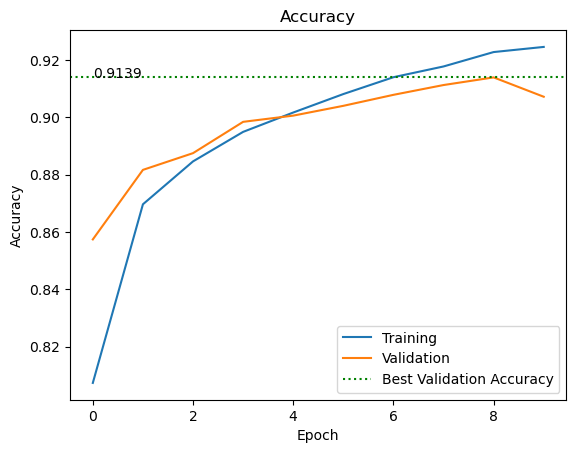

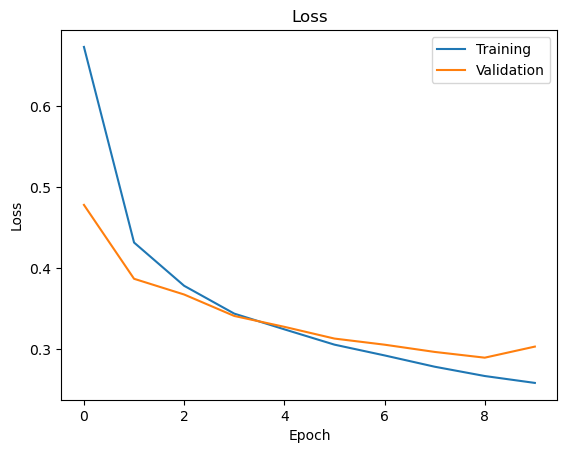

In [15]:
# Get the highest validation accuracy.
best_validation_accuracy = max(result.history['val_accuracy'])
print('Best Validation Accuracy:', best_validation_accuracy)

# Plot the accuracy vs. epoch.
# Highlight the highest validation accuracy.
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axhline(y=best_validation_accuracy, color='g', linestyle=('dotted'))
plt.legend(['Training', 'Validation', 'Best Validation Accuracy'], loc='lower right')
plt.text(0, best_validation_accuracy, str(round(best_validation_accuracy, 4)))
plt.show()

# Plot the loss vs. epoch.
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Evaluate your model. What is the best/highest validation accuracy your network achieved? How did you obtain this accuracy? **(10 marks)**

**Answer:** The best validation accuracy my network achieved is approximately 91%. I retrieved the highest validation accuracy from the history object of the fit() method return value. The history object contains the training metrics collected during training, such as the loss and accuracy for each epoch.

---

In [21]:
import seaborn as sns

# Evaluate the model on the test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: ', round(test_loss, 4))
print('Test accuracy: ', round(test_accuracy, 4))

# Plot the final results - test loss and test accuracy.
fig, ax = plt.subplots()
bars = ax.bar(['Test Loss', 'Test Accuracy'], [test_loss, test_accuracy], color=['lightcoral', 'springgreen'])
ax.bar_label(bars)
ax.set_title('Final Results - Test Data')
ax.set_ylim(0, 1) # Set the y-axis limits to [0, 1].
plt.show()

# Make predictions on the test data.
predictions = model.predict(x_test)
prediciton_labels = np.argmax(predictions, axis=1) # Get the classes with the highest probability.

# Create a confusion matrix.
confusion_matrix = tf.math.confusion_matrix(y_test, prediciton_labels)

# Plot the confusion matrix.
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print the model summary.
model.summary()

NameError: name 'model' is not defined

Plot the final results on the test set and print the accuracy/loss on that set. **(10 marks)**

---

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

I have trained the network with 3 different regularization techniques - L1, L2, and L1/L2. I have found that my model is performing the best when using L2 regularization with a lambda of 0.001. I applied the regularization for the layer with the most number of parameters as it is most likely to overfit. My model was significantly worse and overfitting when applying L1 or L1/L2 regularization (large loss on test data). It makes sense as L1 regularization is more effective when dealing with very high-dimensional datasets (with many irrelevant features). 

It is worth to note that the difference between applying L2 and not applying regularization was not substantial. This is perhaps due to the size/architecture of my neural network or the choice of the hyperparameters. Nevertheless, I ended up using the L2 regularization as it slightly improved the test accuracy. 

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

The model appears to function reasonably well based on the accuracy and loss metrics used for validation and test data. Over the course of training, the training accuracy and validation accuracy both grow and converge to comparable values, showing that the model is not overfitted to the training data. The training loss and validation loss also decrease and converge to similar values. The model is classifying images on the unseen test set with an accuracy of approximately 91%.

When it comes to future improvements, there are a few things I could do to optimise the model. 
- First of all, I could use a K-fold cross validation presented in the lectures to provide a more accurate estimate of model performance than just a single validation set
- Second of all, I could use different optimisation/regularization techniques to improve the accuracy of my model. For example:
  - Dropout ("killing" / dropping out some neurons during training)
  - Early Stopping (stopping the training process when the performance of the model on the validation set starts to degrade)
  - Learning Rate Decay (reducing the learning rate as the training progresses)
  - Data Augmentation (exposing the model to more diverse examples and variations in the training data)
  - Batch Normalization (normalizing the input to each layer)

Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

